# Maratona Behind the Code 2020

## Tentativa 2 da Resolução do Desafio 2 

Instalando Bibliotecas

In [1]:
!pip install scikit-learn==0.20.3 --upgrade
!pip install xgboost==0.71 --upgrade

Requirement already up-to-date: scikit-learn==0.20.3 in c:\users\rafae\anaconda3\lib\site-packages (0.20.3)
  Using cached xgboost-0.71.tar.gz (494 kB)


ERROR: Files/directories not found in C:\Users\rafae\AppData\Local\Temp\pip-install-hvn35uwr\xgboost\pip-egg-info


Importando Bibbliotecas

In [2]:
import json
import requests
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_validate

In [3]:
import seaborn as sns

Importando a Base de Dados

In [4]:
df_data = pd.read_csv("dataset_desafio_2.csv")
df_data

,MATRICULA,NOME,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,PERFIL
0,502375,Márcia Illiglener,0,0,0,0,6.2,5.8,4.6,5.9,0.0,2,4,3,EXATAS
1,397093,Jason Jytereoman Izoimum,0,0,0,0,6.0,6.2,5.2,4.5,1.0,2,4,3,EXATAS
2,915288,Bartolomeu Inácio da Gama,0,0,0,0,7.3,6.7,7.1,7.2,0.0,5,0,3,HUMANAS
3,192652,Fernanda Guedes,1,3,1,1,0.0,0.0,0.0,0.0,1.0,4,4,4,DIFICULDADE
4,949491,Alessandre Borba Gomes,1,3,1,1,0.0,0.0,0.0,0.0,1.0,5,2,5,DIFICULDADE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,856673,Laércio Mário da Silva,0,0,0,0,7.0,7.9,5.8,7.0,1.0,9,5,6,EXATAS
19996,576100,Cibele Quésia Poza,1,1,1,1,0.0,0.0,0.0,NaN,1.0,3,2,5,DIFICULDADE
19997,888739,Marcielle Chale Bape,0,0,0,0,7.9,7.6,8.3,7.2,NaN,8,3,1,EXCELENTE
19998,722743,Suzanne Mirian Mourão,0,0,1,1,6.3,5.1,0.0,0.0,1.0,3,2,6,DIFICULDADE


In [5]:
df_data.describe()

,MATRICULA,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,16284.000000,16372.000000,20000.000000,20000.000000,20000.000000
mean,551148.271400,0.242850,0.242850,0.297650,0.293350,5.196560,5.080285,4.817630,4.534101,0.646286,5.102950,3.140300,4.060600
std,259488.766584,0.615055,0.615055,0.672813,0.661829,2.522545,2.523928,2.734775,2.509209,0.478136,4.118422,1.854909,1.674714
min,100003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,326554.250000,0.000000,0.000000,0.000000,0.000000,5.200000,4.900000,4.700000,4.500000,0.000000,2.000000,2.000000,3.000000
50%,550630.000000,0.000000,0.000000,0.000000,0.000000,6.200000,5.900000,5.500000,5.400000,1.000000,4.000000,3.000000,4.000000
75%,775524.750000,0.000000,0.000000,0.000000,0.000000,6.700000,6.700000,6.500000,6.200000,1.000000,6.000000,5.000000,6.000000
max,999995.000000,3.000000,3.000000,3.000000,3.000000,9.000000,9.400000,11.500000,10.000000,1.000000,25.000000,7.000000,8.000000


In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MATRICULA       20000 non-null  int64  
 1   NOME            20000 non-null  object 
 2   REPROVACOES_DE  20000 non-null  int64  
 3   REPROVACOES_EM  20000 non-null  int64  
 4   REPROVACOES_MF  20000 non-null  int64  
 5   REPROVACOES_GO  20000 non-null  int64  
 6   NOTA_DE         20000 non-null  float64
 7   NOTA_EM         20000 non-null  float64
 8   NOTA_MF         20000 non-null  float64
 9   NOTA_GO         16284 non-null  float64
 10  INGLES          16372 non-null  float64
 11  H_AULA_PRES     20000 non-null  int64  
 12  TAREFAS_ONLINE  20000 non-null  int64  
 13  FALTAS          20000 non-null  int64  
 14  PERFIL          20000 non-null  object 
dtypes: float64(5), int64(8), object(2)
memory usage: 2.3+ MB


### Analisando os dados

In [8]:
colunas_reprovacao = ["REPROVACOES_DE","REPROVACOES_EM","REPROVACOES_MF","REPROVACOES_GO"]
df_data_corr_rep = df_data[colunas_reprovacao]
df_data_corr_rep

,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,1,3,1,1
4,1,3,1,1
...,...,...,...,...
19995,0,0,0,0
19996,1,1,1,1
19997,0,0,0,0
19998,0,0,1,1


In [9]:
colunas_notas = ["NOTA_DE","NOTA_EM","NOTA_MF","NOTA_GO"]
df_data_corr_not = df_data[colunas_notas]
df_data_corr_not

,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO
0,6.2,5.8,4.6,5.9
1,6.0,6.2,5.2,4.5
2,7.3,6.7,7.1,7.2
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
19995,7.0,7.9,5.8,7.0
19996,0.0,0.0,0.0,NaN
19997,7.9,7.6,8.3,7.2
19998,6.3,5.1,0.0,0.0


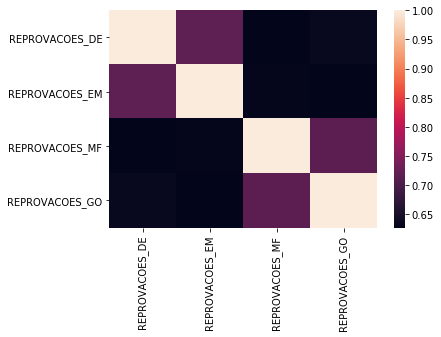

In [16]:
corr_rep = df_data_corr_rep.corr()
sns.heatmap(corr_rep)

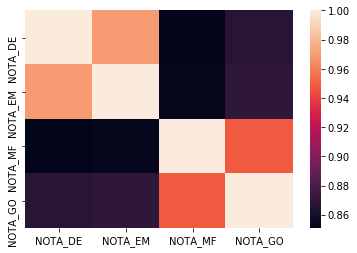

In [17]:
corr_not = df_data_corr_not.corr()
sns.heatmap(corr_not)

### Realizando o pré-processamento dos dados

Transformação 1: excluindo colunas do dataset

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin


# All sklearn Transforms must have the `transform` and `fit` methods
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Primeiro realizamos a cópia do dataframe 'X' de entrada
        data = X.copy()
        # Retornamos um novo dataframe sem as colunas indesejadas
        return data.drop(labels=self.columns, axis='columns')

In [20]:
# Instanciando uma transformação DropColumns
rm_columns = DropColumns(
    columns=["NOME","INGLES"]  # Essa transformação recebe como parâmetro uma lista com os nomes das colunas indesejadas
)

print(rm_columns)

DropColumns(columns=['NOME', 'INGLES'])


In [19]:
# Visualizando as colunas do dataset original
print("Colunas do dataset original: \n")
print(df_data.columns)

Colunas do dataset original: 

Index(['MATRICULA', 'NOME', 'REPROVACOES_DE', 'REPROVACOES_EM',
       'REPROVACOES_MF', 'REPROVACOES_GO', 'NOTA_DE', 'NOTA_EM', 'NOTA_MF',
       'NOTA_GO', 'INGLES', 'H_AULA_PRES', 'TAREFAS_ONLINE', 'FALTAS',
       'PERFIL'],
      dtype='object')


In [21]:
# Aplicando a transformação ``DropColumns`` ao conjunto de dados base
rm_columns.fit(X=df_data)

# Reconstruindo um DataFrame Pandas com o resultado da transformação
df_data_1 = pd.DataFrame.from_records(
    data=rm_columns.transform(
        X=df_data
    ),
)

In [22]:
# Visualizando as colunas do dataset transformado
print("Colunas do dataset após a transformação ``DropColumns``: \n")
print(df_data_1.columns)

Colunas do dataset após a transformação ``DropColumns``: 

Index(['MATRICULA', 'REPROVACOES_DE', 'REPROVACOES_EM', 'REPROVACOES_MF',
       'REPROVACOES_GO', 'NOTA_DE', 'NOTA_EM', 'NOTA_MF', 'NOTA_GO',
       'H_AULA_PRES', 'TAREFAS_ONLINE', 'FALTAS', 'PERFIL'],
      dtype='object')


### Transformação 2: tratando dados faltantes

In [23]:
# Criação de um objeto ``SimpleImputer``
si = SimpleImputer(
    missing_values=np.nan,  # os valores faltantes são do tipo ``np.nan`` (padrão Pandas)
    strategy='constant',  # a estratégia escolhida é a alteração do valor faltante por uma constante
    fill_value=0,  # a constante que será usada para preenchimento dos valores faltantes é um int64=0.
    verbose=0,
    copy=True
)

In [24]:
# Visualizando os dados faltantes do dataset após a primeira transformação (df_data_2)
print("Valores nulos antes da transformação SimpleImputer: \n\n{}\n".format(df_data_1.isnull().sum(axis = 0)))

Valores nulos antes da transformação SimpleImputer: 

MATRICULA            0
REPROVACOES_DE       0
REPROVACOES_EM       0
REPROVACOES_MF       0
REPROVACOES_GO       0
NOTA_DE              0
NOTA_EM              0
NOTA_MF              0
NOTA_GO           3716
H_AULA_PRES          0
TAREFAS_ONLINE       0
FALTAS               0
PERFIL               0
dtype: int64



In [27]:
df_data_1.describe()

,MATRICULA,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,H_AULA_PRES,TAREFAS_ONLINE,FALTAS
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,16284.000000,20000.000000,20000.000000,20000.000000
mean,551148.271400,0.242850,0.242850,0.297650,0.293350,5.196560,5.080285,4.817630,4.534101,5.102950,3.140300,4.060600
std,259488.766584,0.615055,0.615055,0.672813,0.661829,2.522545,2.523928,2.734775,2.509209,4.118422,1.854909,1.674714
min,100003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,326554.250000,0.000000,0.000000,0.000000,0.000000,5.200000,4.900000,4.700000,4.500000,2.000000,2.000000,3.000000
50%,550630.000000,0.000000,0.000000,0.000000,0.000000,6.200000,5.900000,5.500000,5.400000,4.000000,3.000000,4.000000
75%,775524.750000,0.000000,0.000000,0.000000,0.000000,6.700000,6.700000,6.500000,6.200000,6.000000,5.000000,6.000000
max,999995.000000,3.000000,3.000000,3.000000,3.000000,9.000000,9.400000,11.500000,10.000000,25.000000,7.000000,8.000000


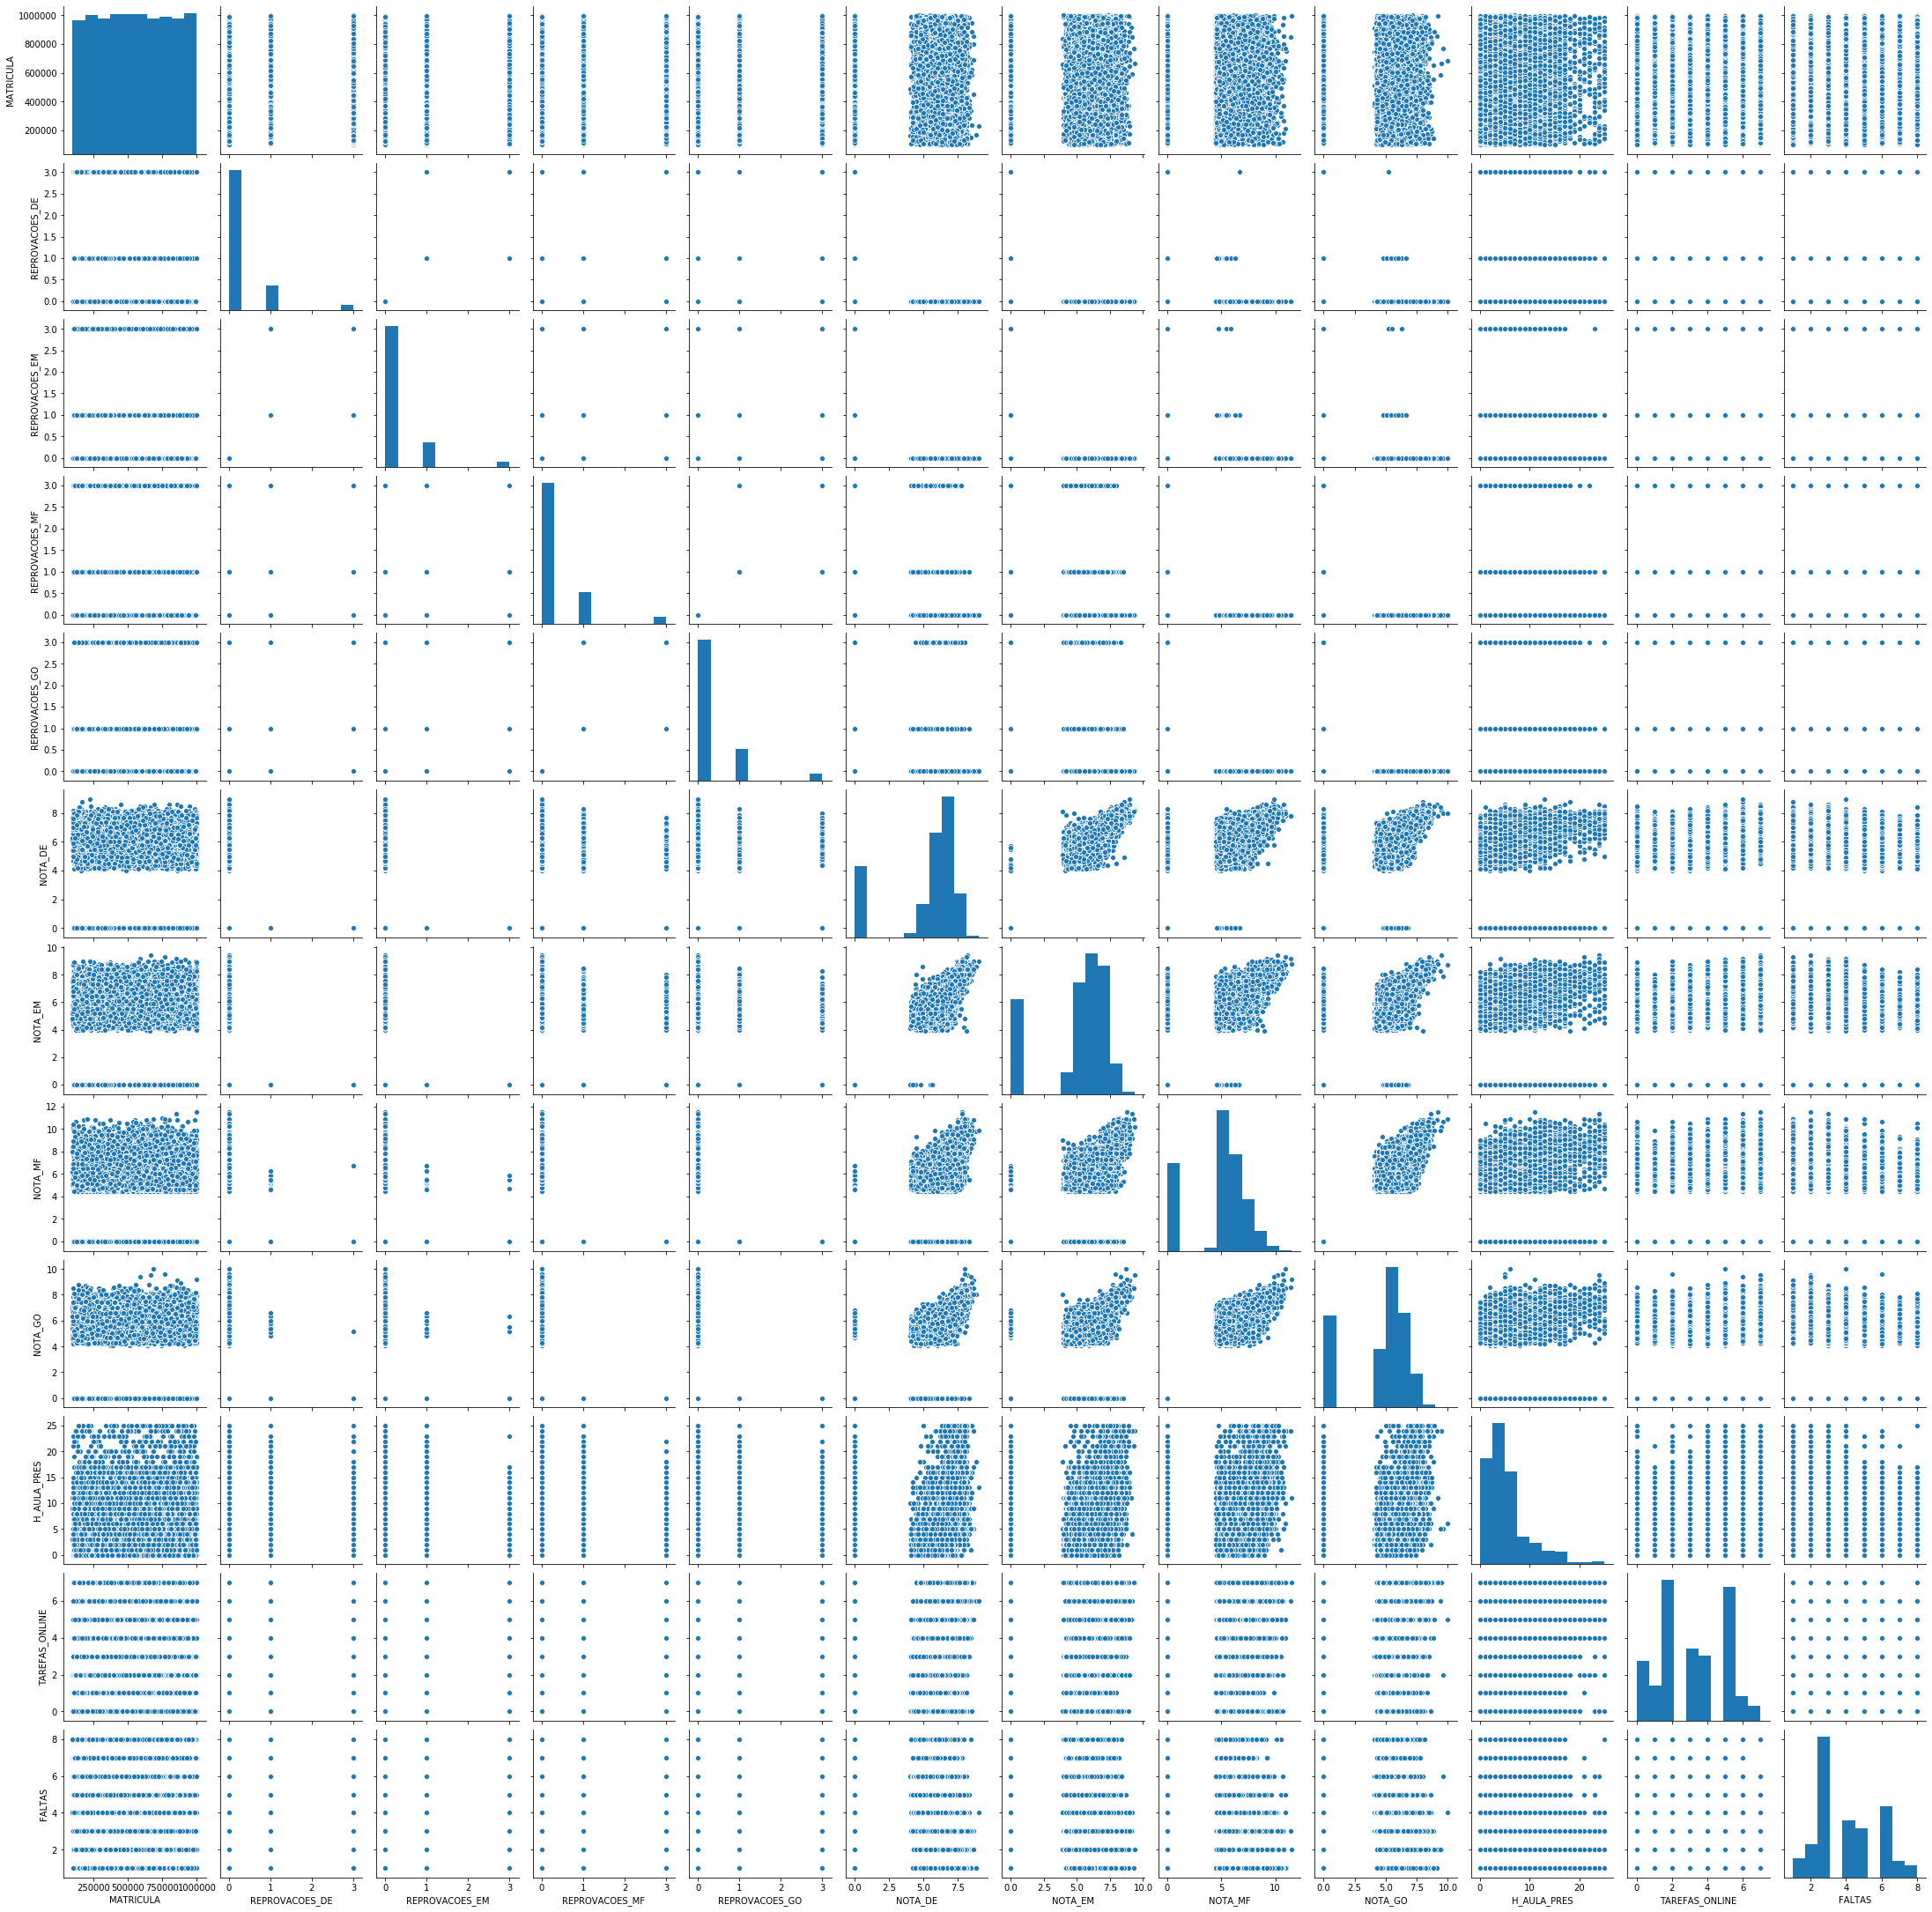

In [28]:
sns.pairplot(df_data_1)